# VRP
#### Aluno: Rafael Eli Katri

In [16]:
import matplotlib.pyplot as plt

### Descrição:

VRP (Vehicle Routing Problem), ou Problema de Roteamento de Veículos, é um problema clássico de otimização combinatória que envolve a determinação das melhores rotas para uma frota de veículos que precisa atender um conjunto de clientes com demandas específicas. 

O objetivo principal é minimizar os custos operacionais, que podem incluir distância percorrida, tempo de viagem, ou custos de combustível, enquanto se respeitam certas restrições, como capacidade dos veículos, janelas de tempo para atendimento dos clientes, e outras especificações logísticas.

O VRP é um problema que possui diversas variantes. Para a implementação do projeto foi escolhido o seguinte escopo: as restrições são capacidade de carga e nós que não são interligados, um nó não pode ser repetido na rota (menos o nó de origem, que aparece somente no início e fim da rota), o veículo não pode voltar à origem para reabastecer a carga e rotas que não passam por todos os nós são permitidas. Nesse problema, o objetivo considerado foi maximizar a relação de valor e custo, ou seja, é calculado o valor total e o custo total de cada rota, e aquela que tiver o maior valor por custo será a melhor rota possível.

Observações: reconhece-se que, devido aos valores de distância e demandas não estarem normalizados, podem existir viezes de escala no cálculo da melhor rota.



## Primeira Versão: Busca global

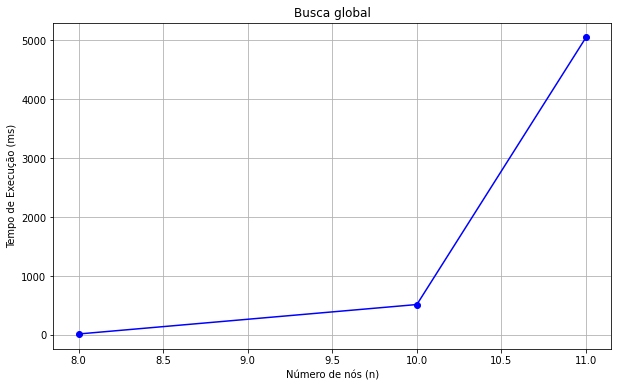

In [17]:

tempo_global = [16, 516, 5051]
n = [8, 10, 11]

plt.figure(figsize=(10, 6))
plt.plot(n, tempo_global, marker='o', linestyle='-', color='b')
plt.title('Busca global')
plt.xlabel('Número de nós (n)')
plt.ylabel('Tempo de Execução (ms)')
plt.grid(True)
plt.show()


É possível observar um aumento considerável no tempo de execução com o aumento da entrada.

Isso é esperado, dado que o tempo para calcular todas as combinações possíveis de rota é fatorial.

## Segunda versão: Heurística

A heurística escolhida foi gerar apenas as combinações de rota com 1 nó, ou seja, nó de origem - nó - nó de origem.

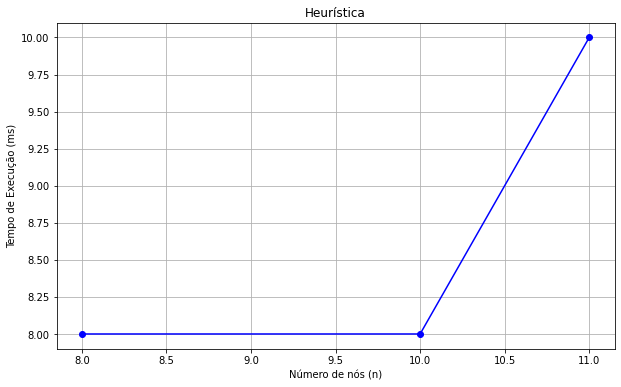

In [18]:
tempo_heu = [8, 8, 10]
n = [8, 10, 11]

plt.figure(figsize=(10, 6))
plt.plot(n, tempo_heu, marker='o', linestyle='-', color='b')
plt.title('Heurística')
plt.xlabel('Número de nós (n)')
plt.ylabel('Tempo de Execução (ms)')
plt.grid(True)
plt.show()

É possível observar que a heurística reduziu consideravelmente o tempo de execução em relação à busca global.

Além disso, todos os resultados da heurística coincidiram com o da busca global.

## Terceira versão: Busca global + OpenMP

As funções de validação de rota e de busca de melhor rota foram paralelizadas com OpenMP, ambas com o uso de #pragma omp parallel for

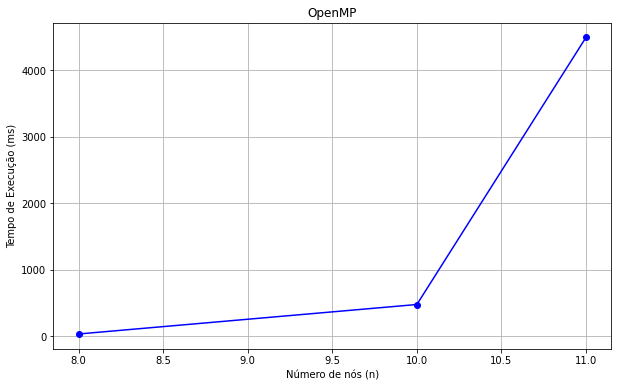

In [19]:
tempo_mp = [35, 478, 4492]
n = [8, 10, 11]

plt.figure(figsize=(10, 6))
plt.plot(n, tempo_mp, marker='o', linestyle='-', color='b')
plt.title('OpenMP')
plt.xlabel('Número de nós (n)')
plt.ylabel('Tempo de Execução (ms)')
plt.grid(True)
plt.show()

É possível observar que o OpenMP apresenta resultados um pouco piores que o não paralelizado para entradas pequenas e resultados melhores que o sequencial para entradas grandes.

Isso faz sentido, considerando que o uso das ferramentas internas do OpenMP pode ser mais custoso do que o ganho de se paralelizar as etapas não sequenciais 
quando a entrada é pequena.


## Quarta versão: Busca global + MPI

Foi utilizado MPI para distribuir a carga entre máquinas diferentes. No rank 0 é calculado a etapa inicial até a validação de rotas,
em seguida as rotas válidas são distribuídas para todos os ranks e cada um encontra a sua melhor rota local. 
Por fim, os resultados locais são enviados para o rank 0, que encontra a melhor rota global. 

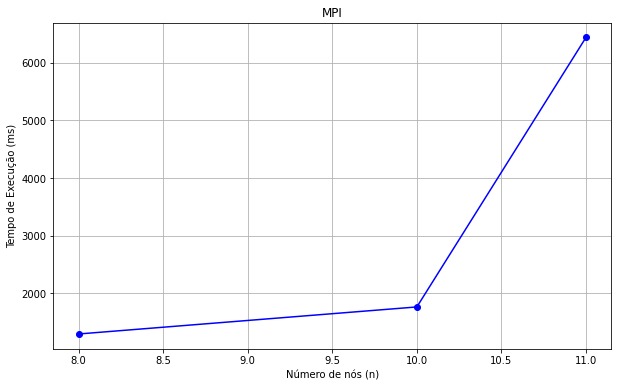

In [20]:
tempo_mpi = [1294, 1763, 6437]
n = [8, 10, 11]

plt.figure(figsize=(10, 6))
plt.plot(n, tempo_mpi, marker='o', linestyle='-', color='b')
plt.title('MPI')
plt.xlabel('Número de nós (n)')
plt.ylabel('Tempo de Execução (ms)')
plt.grid(True)
plt.show()

Os resultados foram consideravelmente piores que o sequencial. 

Isso provavelmente se dá por dois motivos:

* Matrizes tiveram que passar por etapas de flatten e resize para serem enviadas no MPI, isso pode impactar bastante no tempo de execução

* Todo o cálculo de geração e validação de rotas só ocorre no rank 0

## Quinta versão: OpenMP + MPI

O código das duas versões foi combinado. Mesmos pragmas foram usados no OpenMP e mesma estrutura de MPI.

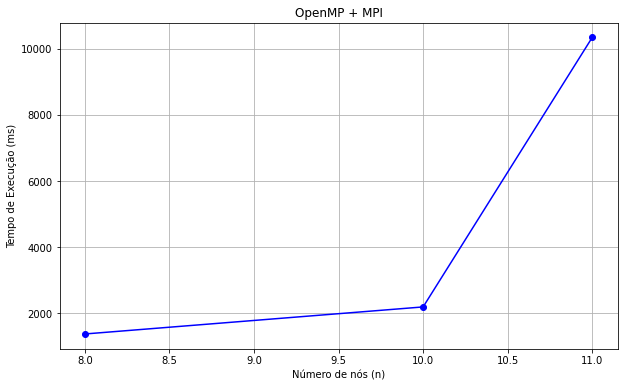

In [21]:
tempo_mp_mpi = [1381, 2198, 10336]
n = [8, 10, 11]

plt.figure(figsize=(10, 6))
plt.plot(n, tempo_mp_mpi, marker='o', linestyle='-', color='b')
plt.title('OpenMP + MPI')
plt.xlabel('Número de nós (n)')
plt.ylabel('Tempo de Execução (ms)')
plt.grid(True)
plt.show()

Percebe-se que os resultados foram piores combinados do que separados. 

Acredito que o problema principal seja a eficiência do MPI.

Era esperado que o OpenMP e MPI introduzissem um maior tempo de execução para entradas pequenas, mas nesse caso nem para entradas maiores é possível encontrar uma melhora.

## Comparação entre todas as versões:

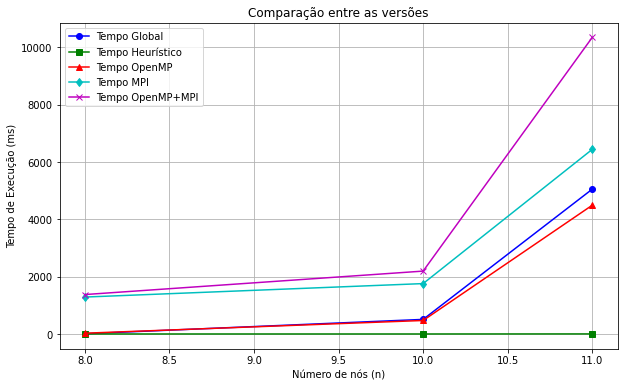

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(n, tempo_global, marker='o', linestyle='-', color='b', label='Tempo Global')
plt.plot(n, tempo_heu, marker='s', linestyle='-', color='g', label='Tempo Heurístico')
plt.plot(n, tempo_mp, marker='^', linestyle='-', color='r', label='Tempo OpenMP')
plt.plot(n, tempo_mpi, marker='d', linestyle='-', color='c', label='Tempo MPI')
plt.plot(n, tempo_mp_mpi, marker='x', linestyle='-', color='m', label='Tempo OpenMP+MPI')
plt.title('Comparação entre as versões')
plt.xlabel('Número de nós (n)')
plt.ylabel('Tempo de Execução (ms)')
plt.legend()
plt.grid(True)
plt.show()

Conclui-se que a heurística teve um ótimo desempenho em relação às demais, com um baixo tempo de execução e boa taxa de acertos. 

O OpenMP também é uma boa escolha para casos com grande número de nós, superando a solução global nessa situação.

A solução de MPI possui problemas de performance e não teve ganhos em relação a global.

A solução de OpenMP com MPI também teve problemas de performance, provavelmente devido as questões antes mencionadas do MPI.